# Credit Card Fraud Detection - Exploratory Data Analysis

This notebook explores the Credit Card Fraud Detection dataset from Kaggle. We'll perform exploratory data analysis to understand the dataset's characteristics and inform our modeling approach.

## Dataset Information

The dataset contains transactions made by credit cards in September 2013 by European cardholders. It presents transactions that occurred in two days, with 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, with the positive class (frauds) accounting for only 0.172% of all transactions.

Features:
- Time: Seconds elapsed between each transaction and the first transaction
- V1-V28: Principal components obtained with PCA transformation (for confidentiality)
- Amount: Transaction amount
- Class: 1 for fraudulent transactions, 0 otherwise

## Executive Summary

**Key Findings from EDA:**
1. **Dataset Size**: 284,807 transactions with 31 features
2. **Class Imbalance**: Highly imbalanced with only 0.172% fraudulent transactions (492 fraud vs 284,315 normal)
3. **Data Quality**: No missing values, all features are numeric
4. **Feature Separability**: Several PCA features (V1, V3, V4, V10, V14, V17) show clear differences between fraud/normal distributions
5. **Amount Patterns**: Fraudulent transactions tend to have smaller amounts with higher variance
6. **Time Distribution**: Fraud occurs throughout the observation period with some temporal patterns

**Modeling Implications:**
- Class imbalance requires sampling techniques (SMOTE, undersampling, class weighting)
- Feature engineering opportunities exist for amount and time variables
- Strong feature separability suggests good predictive potential
- Correlation analysis identifies most predictive features

In [1]:
# Import necessary libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

# Set Matplotlib and Seaborn styles
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('viridis')

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set random seed for reproducibility
np.random.seed(42)

## Data Loading

In [2]:
# Create data directory if it doesn't exist
os.makedirs('data/raw', exist_ok=True)

# Use the full dataset 
csv_path = 'data/raw/creditcard.csv'
print(f"Loading dataset from: {csv_path}")

# Load the dataset
df = pd.read_csv(csv_path)

# Display basic information
print(f"Dataset shape: {df.shape}")
print(f"Memory usage: {df.memory_usage().sum() / (1024**2):.2f} MB")

Loading dataset from: data/raw/creditcard.csv


Dataset shape: (284807, 31)
Memory usage: 67.36 MB


In [3]:
# Display the first few rows of the dataset
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.000,-1.360,-0.073,2.536,1.378,-0.338,0.462,0.240,0.099,0.364,0.091,-0.552,-0.618,-0.991,-0.311,1.468,-0.470,0.208,0.026,0.404,0.251,-0.018,0.278,-0.110,0.067,0.129,-0.189,0.134,-0.021,149.620,0
1,0.000,1.192,0.266,0.166,0.448,0.060,-0.082,-0.079,0.085,-0.255,-0.167,1.613,1.065,0.489,-0.144,0.636,0.464,-0.115,-0.183,-0.146,-0.069,-0.226,-0.639,0.101,-0.340,0.167,0.126,-0.009,0.015,2.690,0
2,1.000,-1.358,-1.340,1.773,0.380,-0.503,1.800,0.791,0.248,-1.515,0.208,0.625,0.066,0.717,-0.166,2.346,-2.890,1.110,-0.121,-2.262,0.525,0.248,0.772,0.909,-0.689,-0.328,-0.139,-0.055,-0.060,378.660,0
3,1.000,-0.966,-0.185,1.793,-0.863,-0.010,1.247,0.238,0.377,-1.387,-0.055,-0.226,0.178,0.508,-0.288,-0.631,-1.060,-0.684,1.966,-1.233,-0.208,-0.108,0.005,-0.190,-1.176,0.647,-0.222,0.063,0.061,123.500,0
4,2.000,-1.158,0.878,1.549,0.403,-0.407,0.096,0.593,-0.271,0.818,0.753,-0.823,0.538,1.346,-1.120,0.175,-0.451,-0.237,-0.038,0.803,0.409,-0.009,0.798,-0.137,0.141,-0.206,0.502,0.219,0.215,69.990,0


## Data Overview

In [4]:
# Check data types and missing values
print("Data types:")
print(df.dtypes)

print("\nMissing values:")
print(df.isnull().sum())

Data types:
Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

Missing values:
Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [5]:
# Get basic statistics
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000,284807.000,284807.000,284807.000,284807.000,284807.000,284807.000,284807.000,284807.000,284807.000,284807.000,284807.000,284807.000,284807.000,284807.000,284807.000,284807.000,284807.000,284807.000,284807.000,284807.000,284807.000,284807.000,284807.000,284807.000,284807.000,284807.000,284807.000,284807.000,284807.000,284807.000
mean,94813.860,0.000,0.000,-0.000,0.000,0.000,0.000,-0.000,0.000,-0.000,0.000,0.000,-0.000,0.000,0.000,0.000,0.000,-0.000,0.000,0.000,0.000,0.000,-0.000,0.000,0.000,0.000,0.000,-0.000,-0.000,88.350,0.002
std,47488.146,1.959,1.651,1.516,1.416,1.380,1.332,1.237,1.194,1.099,1.089,1.021,0.999,0.995,0.959,0.915,0.876,0.849,0.838,0.814,0.771,0.735,0.726,0.624,0.606,0.521,0.482,0.404,0.330,250.120,0.042
min,0.000,-56.408,-72.716,-48.326,-5.683,-113.743,-26.161,-43.557,-73.217,-13.434,-24.588,-4.797,-18.684,-5.792,-19.214,-4.499,-14.130,-25.163,-9.499,-7.214,-54.498,-34.830,-10.933,-44.808,-2.837,-10.295,-2.605,-22.566,-15.430,0.000,0.000
25%,54201.500,-0.920,-0.599,-0.890,-0.849,-0.692,-0.768,-0.554,-0.209,-0.643,-0.535,-0.762,-0.406,-0.649,-0.426,-0.583,-0.468,-0.484,-0.499,-0.456,-0.212,-0.228,-0.542,-0.162,-0.355,-0.317,-0.327,-0.071,-0.053,5.600,0.000
50%,84692.000,0.018,0.065,0.180,-0.020,-0.054,-0.274,0.040,0.022,-0.051,-0.093,-0.033,0.140,-0.014,0.051,0.048,0.066,-0.066,-0.004,0.004,-0.062,-0.029,0.007,-0.011,0.041,0.017,-0.052,0.001,0.011,22.000,0.000
75%,139320.500,1.316,0.804,1.027,0.743,0.612,0.399,0.570,0.327,0.597,0.454,0.740,0.618,0.663,0.493,0.649,0.523,0.400,0.501,0.459,0.133,0.186,0.529,0.148,0.440,0.351,0.241,0.091,0.078,77.165,0.000
max,172792.000,2.455,22.058,9.383,16.875,34.802,73.302,120.589,20.007,15.595,23.745,12.019,7.848,7.127,10.527,8.878,17.315,9.254,5.041,5.592,39.421,27.203,10.503,22.528,4.585,7.520,3.517,31.612,33.848,25691.160,1.000


## Class Distribution Analysis

Let's examine the class distribution to understand the extent of class imbalance.

Class distribution:
Class
0    284315
1       492
Name: count, dtype: int64
Fraud ratio: 0.001727 (492 out of 284807)


/var/folders/t2/6g486dzd3dq20ytj3wxbsk780000gp/T/ipykernel_66757/1486912753.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Class', data=df, palette=['#2ecc71', '#e74c3c'])


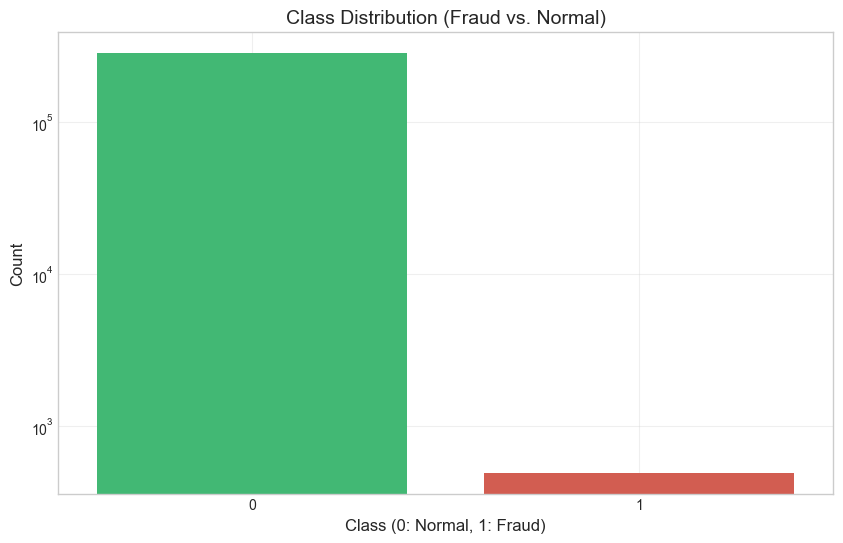

In [6]:
# Check class distribution
class_counts = df['Class'].value_counts()
print("Class distribution:")
print(class_counts)
print(f"Fraud ratio: {class_counts[1] / len(df):.6f} ({class_counts[1]} out of {len(df)})")

# Plot class distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='Class', data=df, palette=['#2ecc71', '#e74c3c'])
plt.title('Class Distribution (Fraud vs. Normal)', fontsize=14)
plt.xlabel('Class (0: Normal, 1: Fraud)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.yscale('log')  # Log scale for better visibility
plt.grid(True, alpha=0.3)
plt.savefig('images/class_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

As expected, the dataset is highly imbalanced. Fraud cases represent only about 0.172% of all transactions. This imbalance will significantly impact our modeling approach.

## Feature Analysis

Let's analyze the features to understand their distributions and relationships.

In [7]:
# Separate features by class
fraud_df = df[df['Class'] == 1]
normal_df = df[df['Class'] == 0]

print(f"Fraud transactions: {len(fraud_df)}")
print(f"Normal transactions: {len(normal_df)}")

Fraud transactions: 492
Normal transactions: 284315


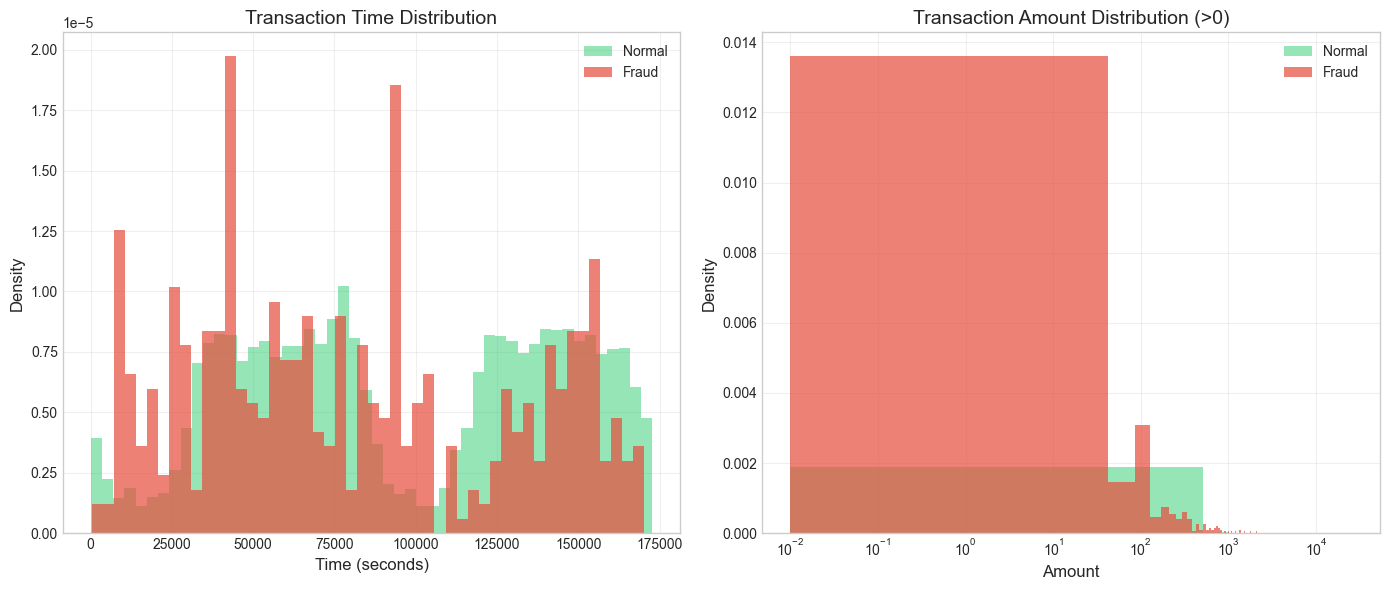

In [8]:
# Analyze Time and Amount features
plt.figure(figsize=(14, 6))

# Time distribution
plt.subplot(1, 2, 1)
plt.hist(normal_df['Time'], bins=50, alpha=0.5, label='Normal', color='#2ecc71', density=True)
plt.hist(fraud_df['Time'], bins=50, alpha=0.7, label='Fraud', color='#e74c3c', density=True)
plt.title('Transaction Time Distribution', fontsize=14)
plt.xlabel('Time (seconds)', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.legend()
plt.grid(True, alpha=0.3)

# Amount distribution (log scale)
plt.subplot(1, 2, 2)
normal_amounts = normal_df['Amount'][normal_df['Amount'] > 0]
fraud_amounts = fraud_df['Amount'][fraud_df['Amount'] > 0]
plt.hist(normal_amounts, bins=50, alpha=0.5, label='Normal', color='#2ecc71', density=True)
plt.hist(fraud_amounts, bins=50, alpha=0.7, label='Fraud', color='#e74c3c', density=True)
plt.title('Transaction Amount Distribution (>0)', fontsize=14)
plt.xlabel('Amount', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.xscale('log')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('images/time_amount_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

In [9]:
# Statistics for Amount by class
print("Amount statistics for Normal transactions:")
print(normal_df['Amount'].describe())
print("\nAmount statistics for Fraudulent transactions:")
print(fraud_df['Amount'].describe())

Amount statistics for Normal transactions:
count   284315.000
mean        88.291
std        250.105
min          0.000
25%          5.650
50%         22.000
75%         77.050
max      25691.160
Name: Amount, dtype: float64

Amount statistics for Fraudulent transactions:
count    492.000
mean     122.211
std      256.683
min        0.000
25%        1.000
50%        9.250
75%      105.890
max     2125.870
Name: Amount, dtype: float64


### Feature Distributions

Let's visualize the distributions of the V1-V28 features to see if they show distinct patterns for fraud vs. normal transactions.

In [10]:
# Function to plot feature distributions
def plot_feature_distributions(features, n_cols=3):
    n_features = len(features)
    n_rows = (n_features + n_cols - 1) // n_cols
    
    plt.figure(figsize=(n_cols * 5, n_rows * 3))
    
    for i, feature in enumerate(features):
        plt.subplot(n_rows, n_cols, i + 1)
        
        sns.kdeplot(normal_df[feature], label='Normal', color='#2ecc71', alpha=0.7)
        sns.kdeplot(fraud_df[feature], label='Fraud', color='#e74c3c', alpha=0.7)
        
        plt.title(f'{feature} Distribution', fontsize=12)
        plt.xlabel(feature, fontsize=10)
        plt.ylabel('Density', fontsize=10)
        plt.grid(True, alpha=0.3)
        
        if i == 0:  # Only show legend for the first plot
            plt.legend()
    
    plt.tight_layout()
    plt.show()

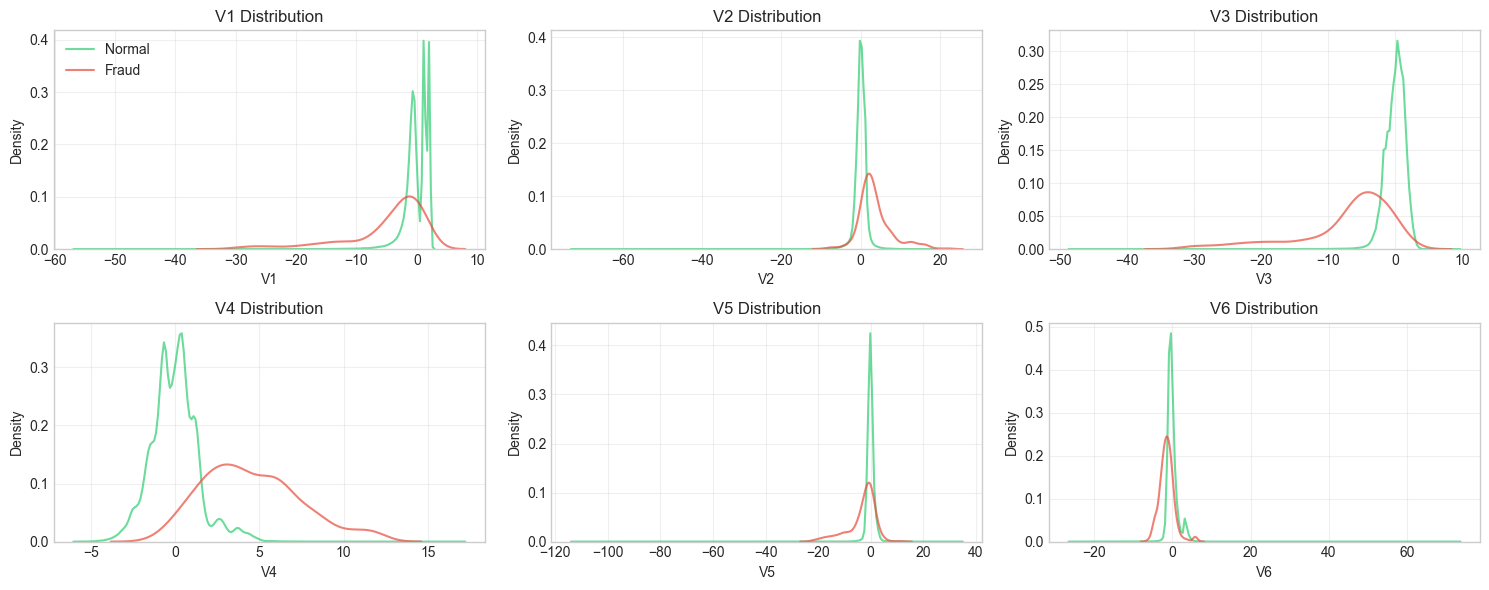

In [11]:
# Plot the first 6 V features
plot_feature_distributions(['V1', 'V2', 'V3', 'V4', 'V5', 'V6'])

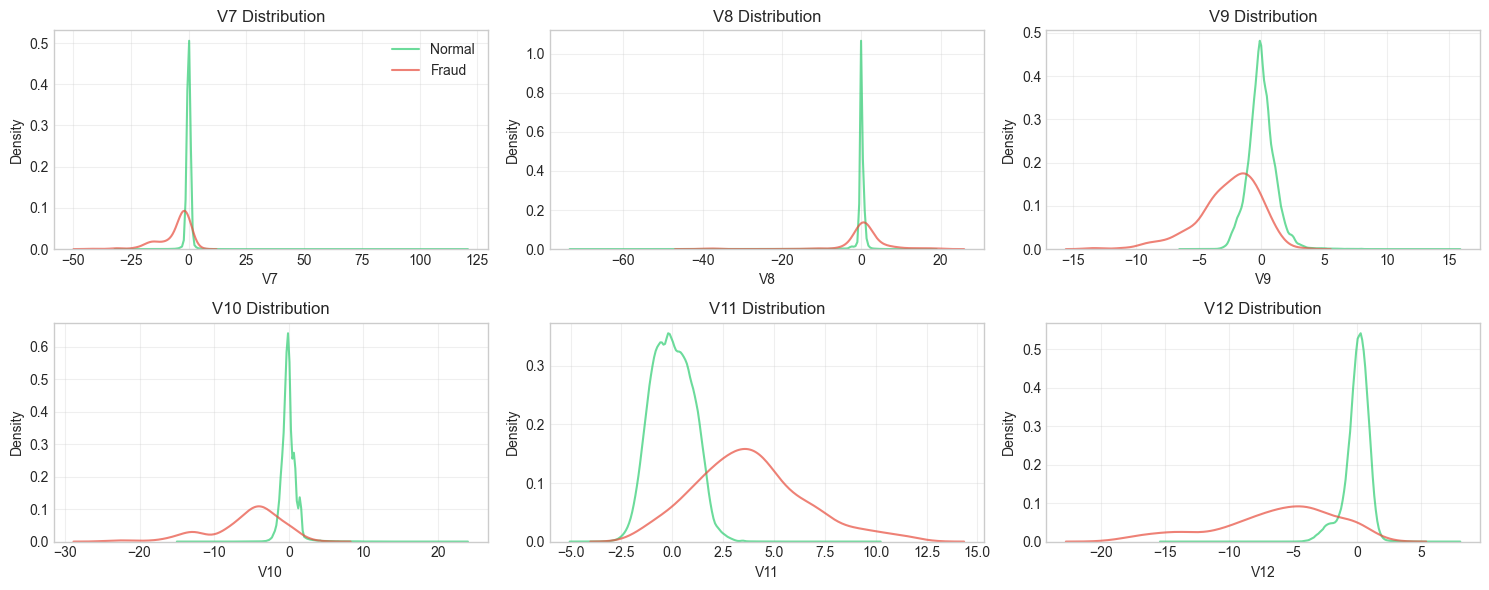

In [12]:
# Plot features V7-V12
plot_feature_distributions(['V7', 'V8', 'V9', 'V10', 'V11', 'V12'])

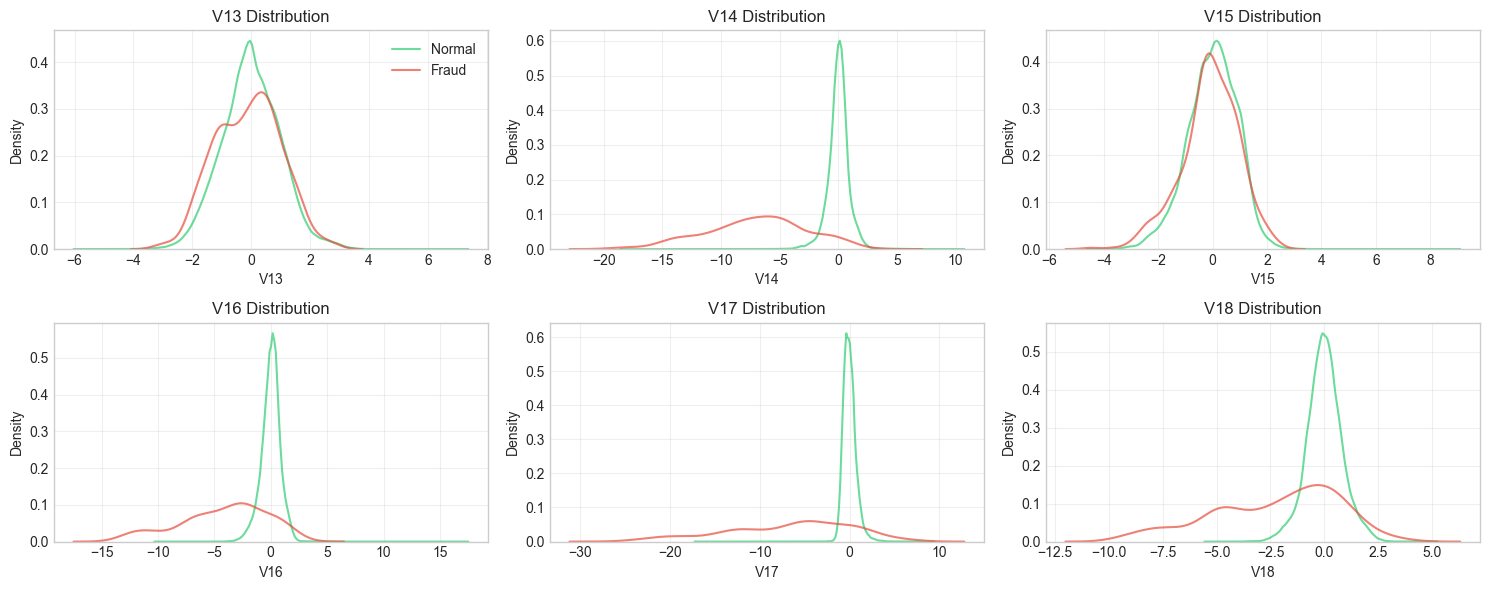

In [13]:
# Plot features V13-V18
plot_feature_distributions(['V13', 'V14', 'V15', 'V16', 'V17', 'V18'])

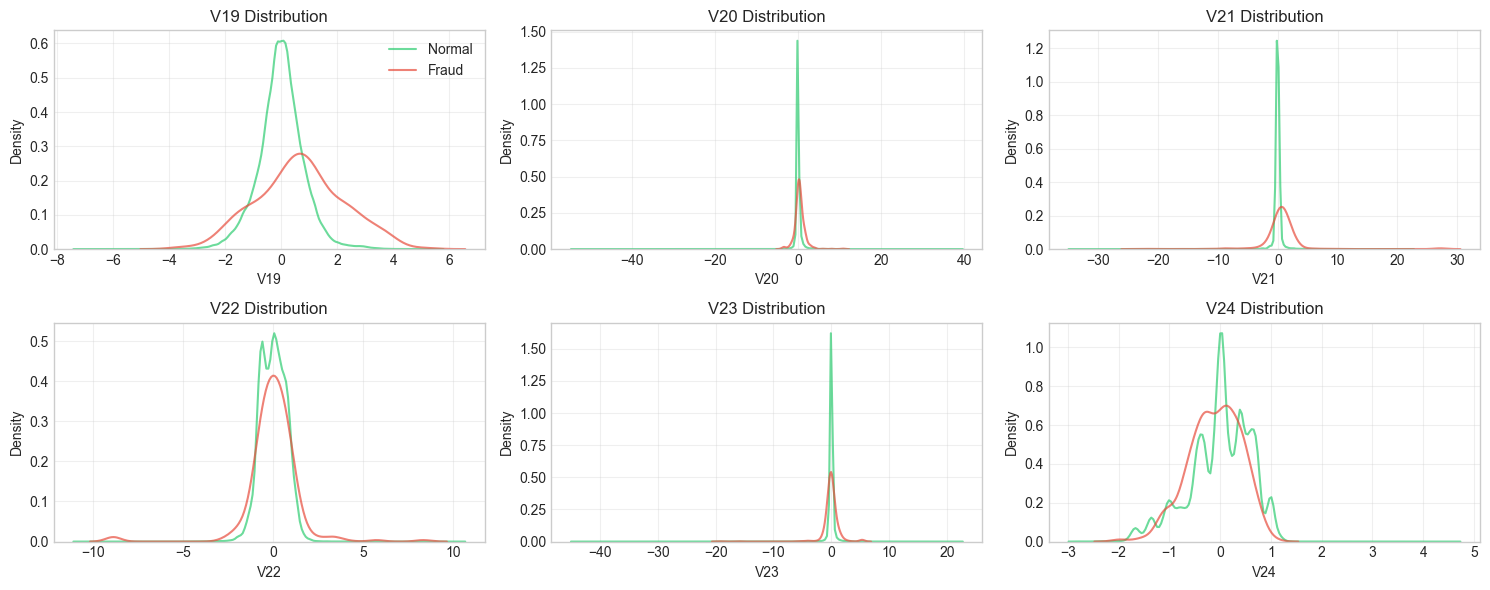

In [14]:
# Plot features V19-V24
plot_feature_distributions(['V19', 'V20', 'V21', 'V22', 'V23', 'V24'])

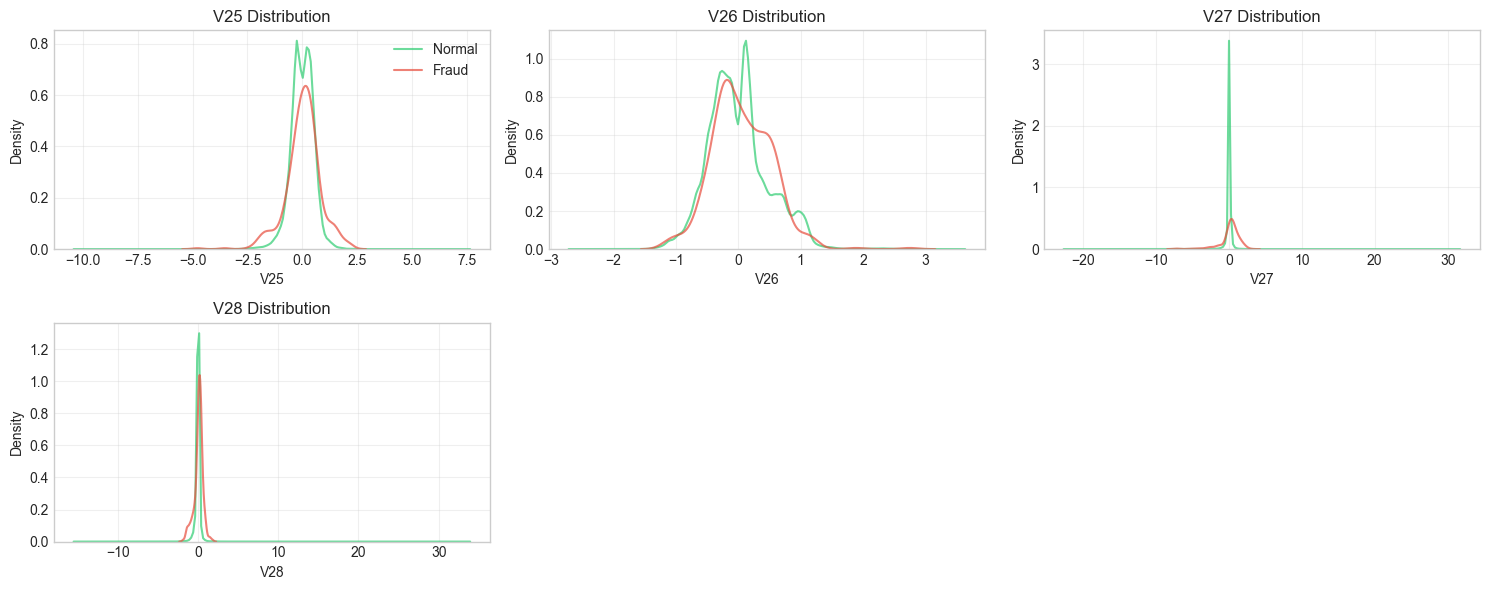

In [15]:
# Plot features V25-V28
plot_feature_distributions(['V25', 'V26', 'V27', 'V28'])

We can observe that several features (e.g., V1, V3, V4, V10, V14, V17) show clear differences in distributions between fraud and normal transactions. These features will likely be important for our fraud detection model.

## Correlation Analysis

Let's examine the correlations between features to identify potential relationships.

In [16]:
# Calculate correlation with the Class variable
correlations = df.corr()['Class'].sort_values(ascending=False)

# Display top positive and negative correlations
print("Top 10 features positively correlated with fraud:")
print(correlations.head(11))  # 11 because Class itself is included

print("\nTop 10 features negatively correlated with fraud:")
print(correlations.tail(10))

Top 10 features positively correlated with fraud:
Class    1.000
V11      0.155
V4       0.133
V2       0.091
V21      0.040
V19      0.035
V20      0.020
V8       0.020
V27      0.018
V28      0.010
Amount   0.006
Name: Class, dtype: float64

Top 10 features negatively correlated with fraud:
V9    -0.098
V1    -0.101
V18   -0.111
V7    -0.187
V3    -0.193
V16   -0.197
V10   -0.217
V12   -0.261
V14   -0.303
V17   -0.326
Name: Class, dtype: float64


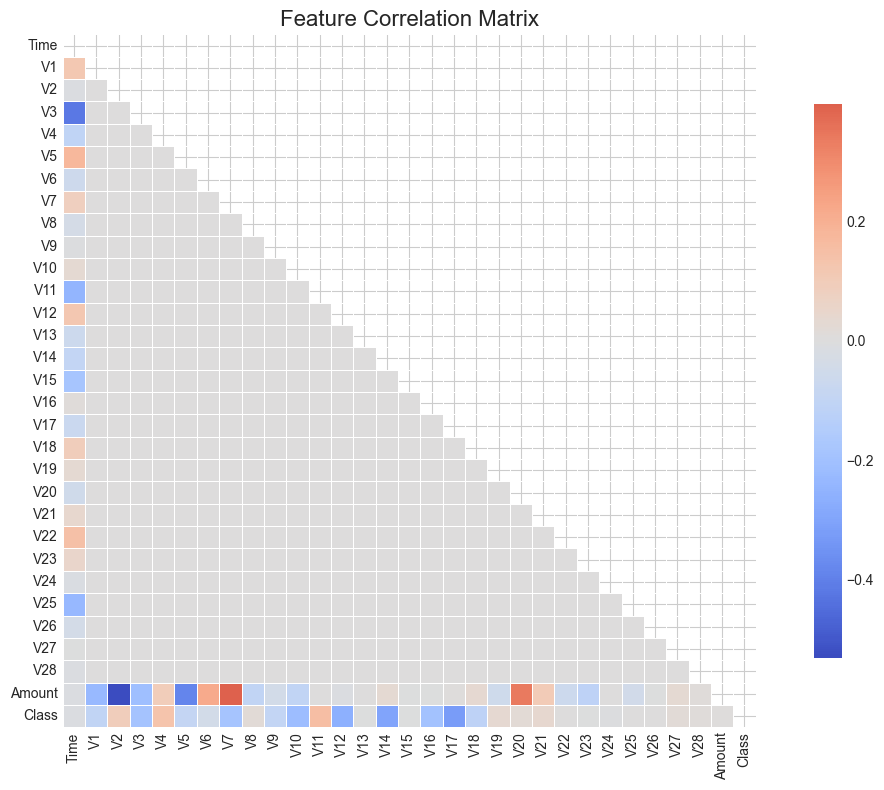

In [17]:
# Visualize correlations
plt.figure(figsize=(12, 8))
corr_matrix = df.corr()

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Generate heatmap
sns.heatmap(corr_matrix, mask=mask, annot=False, cmap='coolwarm', center=0,
            square=True, linewidths=0.5, cbar_kws={"shrink": .8})
plt.title('Feature Correlation Matrix', fontsize=16)
plt.tight_layout()
plt.savefig('images/features_correlation.png', dpi=300, bbox_inches='tight')
plt.show()

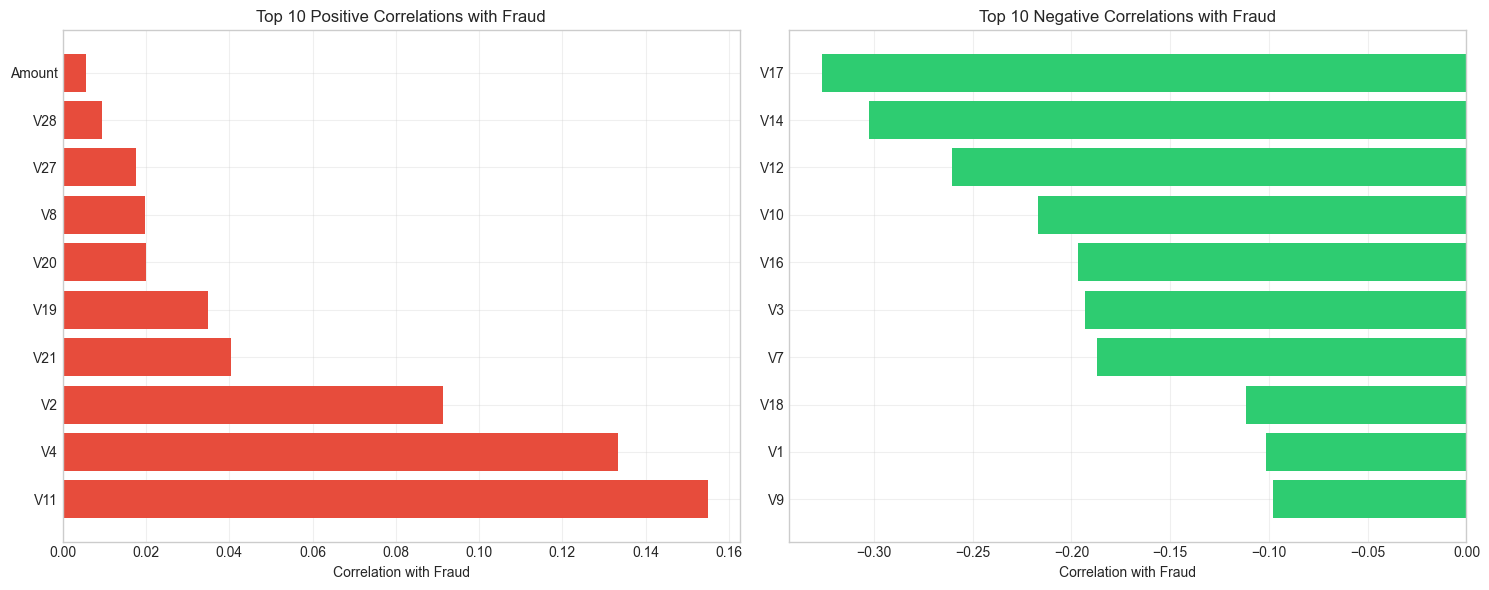

In [18]:
# Plot top correlations with fraud
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Top positive correlations
top_pos = correlations.drop('Class').head(10)
ax1.barh(range(len(top_pos)), top_pos.values, color='#e74c3c')
ax1.set_yticks(range(len(top_pos)))
ax1.set_yticklabels(top_pos.index)
ax1.set_xlabel('Correlation with Fraud')
ax1.set_title('Top 10 Positive Correlations with Fraud')
ax1.grid(True, alpha=0.3)

# Top negative correlations
top_neg = correlations.tail(10)
ax2.barh(range(len(top_neg)), top_neg.values, color='#2ecc71')
ax2.set_yticks(range(len(top_neg)))
ax2.set_yticklabels(top_neg.index)
ax2.set_xlabel('Correlation with Fraud')
ax2.set_title('Top 10 Negative Correlations with Fraud')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('images/feature_importance.png', dpi=300, bbox_inches='tight')
plt.show()

## PCA Visualization

Let's use PCA to visualize the high-dimensional data in 2D space.

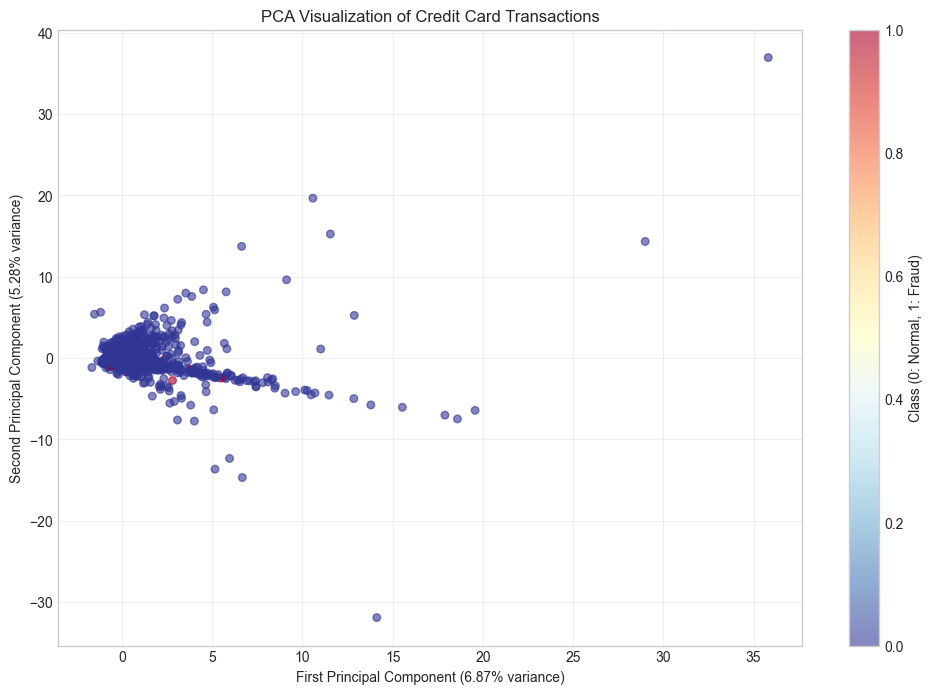

Explained variance ratio: [0.06874643 0.05284118]
Total explained variance: 12.16%


In [19]:
# Sample data for visualization (to avoid memory issues)
np.random.seed(42)
sample_size = 5000
sample_indices = np.random.choice(df.index, size=min(sample_size, len(df)), replace=False)
df_sample = df.loc[sample_indices]

# Prepare features for PCA (exclude Time and Class)
features_for_pca = df_sample.drop(['Time', 'Class'], axis=1)

# Standardize features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features_for_pca)

# Apply PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(features_scaled)

# Create visualization
plt.figure(figsize=(12, 8))
scatter = plt.scatter(pca_result[:, 0], pca_result[:, 1], 
                     c=df_sample['Class'], cmap='RdYlBu_r', alpha=0.6, s=30)
plt.colorbar(scatter, label='Class (0: Normal, 1: Fraud)')
plt.xlabel(f'First Principal Component ({pca.explained_variance_ratio_[0]:.2%} variance)')
plt.ylabel(f'Second Principal Component ({pca.explained_variance_ratio_[1]:.2%} variance)')
plt.title('PCA Visualization of Credit Card Transactions')
plt.grid(True, alpha=0.3)
plt.savefig('images/pca_visualization.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"Explained variance ratio: {pca.explained_variance_ratio_}")
print(f"Total explained variance: {pca.explained_variance_ratio_.sum():.2%}")

## Key Findings and Insights

Based on our exploratory data analysis, we can draw the following conclusions:

### 1. Dataset Characteristics
- **Size**: 284,807 transactions with 31 features
- **Quality**: No missing values, all features are numeric
- **Memory**: ~67MB dataset size

### 2. Class Imbalance
- **Severe imbalance**: Only 0.172% of transactions are fraudulent (492 fraud vs 284,315 normal)
- **Modeling implications**: Will require special handling during model training (class weighting, sampling techniques)

### 3. Feature Analysis
- **Strong separability**: Several PCA features (V1, V3, V4, V10, V14, V17) show clear differences between fraud/normal distributions
- **Correlation insights**: Features V17, V14, V12, V10 are strongly negatively correlated with fraud
- **Positive correlations**: Features V2, V4, V11 show positive relationships with fraud

### 4. Transaction Patterns
- **Amount**: Fraudulent transactions tend to have smaller average amounts but higher variance
- **Time**: Fraud occurs throughout the observation period with some temporal patterns
- **Distribution differences**: Clear separability in feature distributions suggests good predictive potential

### 5. Feature Engineering Opportunities
- **Amount transformations**: Log scaling, binning based on percentiles
- **Time features**: Hour of day, day patterns from seconds elapsed
- **Interaction features**: Combinations of highly correlated features
- **Anomaly scores**: Distance-based features from normal transaction patterns

## Next Steps

In the next notebook (`02_feature_engineering.ipynb`), we'll:
1. **Implement feature engineering** to enhance the predictive power of the model
2. **Apply various sampling techniques** to address class imbalance (SMOTE, ADASYN, undersampling)
3. **Create balanced datasets** for model training
4. **Design feature selection** strategies to identify the most important variables
5. **Prepare data splits** for model development and evaluation

The strong feature separability and clear patterns identified in this EDA suggest that our fraud detection model has excellent potential for high performance.